In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('weight-height.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10501 entries, 0 to 10500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  10501 non-null  object
 1   Height  10500 non-null  object
 2   Weight  10500 non-null  object
dtypes: object(3)
memory usage: 246.2+ KB


In [7]:
df.describe()

,Gender,Height,Weight
count,10501,10500,10500
unique,4,90,207
top,Female,65,139
freq,5253,920,133


T:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 6 missing from current font.
  font.set_text(s, 0.0, flags=flags)
T:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 6 missing from current font.
  font.set_text(s, 0, flags=flags)


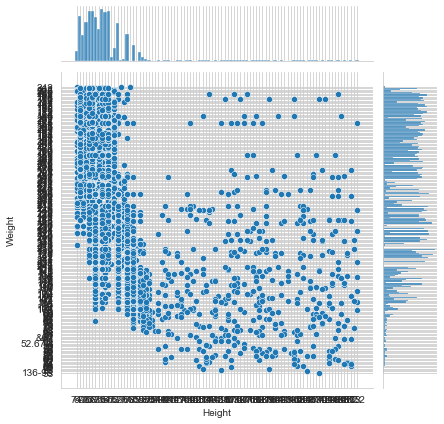

In [8]:
sns.jointplot(x='Height', y='Weight', data=df)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

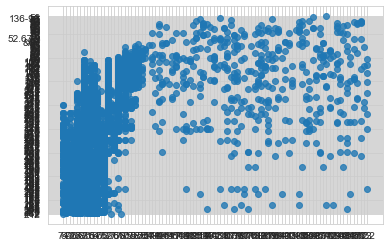

In [9]:
sns.regplot(x='Height', y='Weight', data=df)

T:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 6 missing from current font.
  font.set_text(s, 0.0, flags=flags)
T:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 6 missing from current font.
  font.set_text(s, 0, flags=flags)


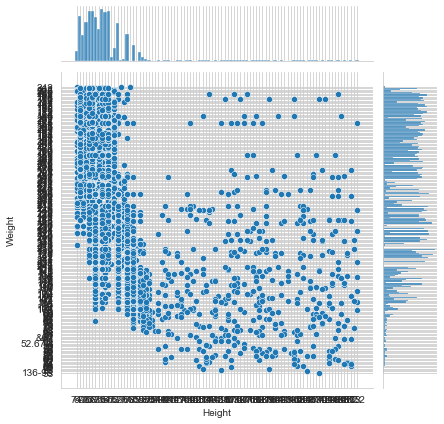

In [10]:
sns.jointplot(x='Height', y='Weight', data=df)

In [15]:
import csv

class Body_Mass_Index:
    bmi_category ={ 'UW' :'Underweight',
                    'NW': 'Normal Weight',
                    'OW': 'Over Weight',
                    'MO': 'Moderately obese',
                    'SO': 'Severly obese',
                    'VSO': 'Very Severly obese',
                   }

    health_risk = {
                    'MR':'Malnutrition Risk',
                    'LR': 'Low Risk',
                    'ER': 'Enhanced Risk',
                    'MRS': 'Medium Risk',
                    'HR': 'High Risk',
                    'VHR': 'Very High Risk',
    }


def reader_contents():
    list_of_line = []
    with open('weight-height.csv') as file:
        alllines = csv.reader(file)
        for line in alllines:
            list_of_line.append(line)
        return list_of_line


def finalizedata_with_bmi(alldata):
    line_count = 0
    notValidData = []
    validData = []
    for line in alldata:
        if line_count == 0:
            line_count = 1
        elif line[0].isalpha() == True and line[1].isnumeric() == True and line[2].isnumeric() == True :
            bmi = calculate_bmi(line)
            validData.append(line+bmi)
            line_count +=1
        else:
            notValidData.append(line)
            line_count +=1
    
    return validData


def calculate_bmi(data):
    BMI_category= None
    Health_risk= None
    BMI_range = None
    x =int(data[1])
    y = int(data[2])
    bmi = y/((x/100)**2)
    if bmi <= 18.4 :
        BMI_category = Body_Mass_Index.bmi_category.get('UW')
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('MR')
    elif bmi >=18.5 and bmi <= 24.9:
        BMI_category = Body_Mass_Index.bmi_category.get('NW')
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('LR')
    elif bmi >=25 and bmi <= 29.9:
        BMI_category = Body_Mass_Index.bmi_category.get("OW")
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('ER')
    elif bmi >=30 and bmi <= 34.9:
        BMI_category = Body_Mass_Index.bmi_category.get("MO")
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('MRS')
    elif bmi >= 35 and bmi <= 39.9:
        BMI_category = Body_Mass_Index.bmi_category.get("SO")
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('HR')
    elif bmi > 40:
        BMI_category = Body_Mass_Index.bmi_category.get("VSO")
        BMI_range = bmi
        Health_risk = Body_Mass_Index.health_risk.get('VHR')
    bmi_list =[BMI_category,BMI_range,Health_risk]
    return bmi_list


def writing_csv(data):
    with open('OutputBMI.csv', 'w',newline='') as file:
        csv_data = csv.writer(file, delimiter=',')
        csv_data.writeline(['Gender', 'Height', 'Weight', 'BMI_category', 'BMI_range', 'Health_risk'])
        for line in data:
            # printing(line)
            csv_data.writelines([line])
    return 'CSV File is added as OutputBMI.CSV'


if __name__ == '__main__':
    contents = reader_contents()
    # printing the (result)
    final_data = finalizedata_with_bmi(contents)
    # print('finish data with BMI-->',finaldata)
    result = write_csv(final_data)
    print(result)


CSV File is added as OutputBMI.CSV
